# House Sales in King County, USA Dataset for Machine Learning

## I. Data Acquisition

In [0]:
# import needed libraries 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam

In [0]:
# import HR csv file
df=pd.read_csv('kc_house_data.csv')

### Plotting Functions

In [0]:
def plotTrainingHist(history, epoch, regType):
  plt.figure(figsize=(15,8))
  plt.plot(history.history['val_loss'])
  plt.plot(history.history['loss'])
  plt.xlim(0, epoch-1)
  plt.xlabel('Epoch')
  plt.legend(['Val_Loss', 'Loss'], loc='upper right')
  plt.title(regType + ': Val_Loss:' + str(round(np.mean(history.history['val_loss']),3)) + ' ' + 'Loss:'+ str(round(np.mean(history.history['loss']),3)), fontsize=14)
  plt.show()

def confMatrix(X_test, y_test, model, regType):
  y_pred1 = lr_model.predict(X_test)
  y_pred = y_pred1.round(0)
  print(classification_report(y_test, y_pred))
  f, ax = plt.subplots(figsize=(13,8))
  model_y_pred1 = model.predict(X_test, verbose=1)
  model_y_pred= model_y_pred1.round(0)
  model_cm = confusion_matrix(y_test,model_y_pred,[0,1])
  sns.heatmap(model_cm, annot=True, fmt='g', cmap="RdBu", xticklabels = ["0", "1"] , yticklabels = ["0", "1"], ax=ax )
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(regType + ' : Confusion Matrix', fontsize=20)

## II. Data Analysis and Data Cleaning

In [104]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [106]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [107]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## III. Data Visualization

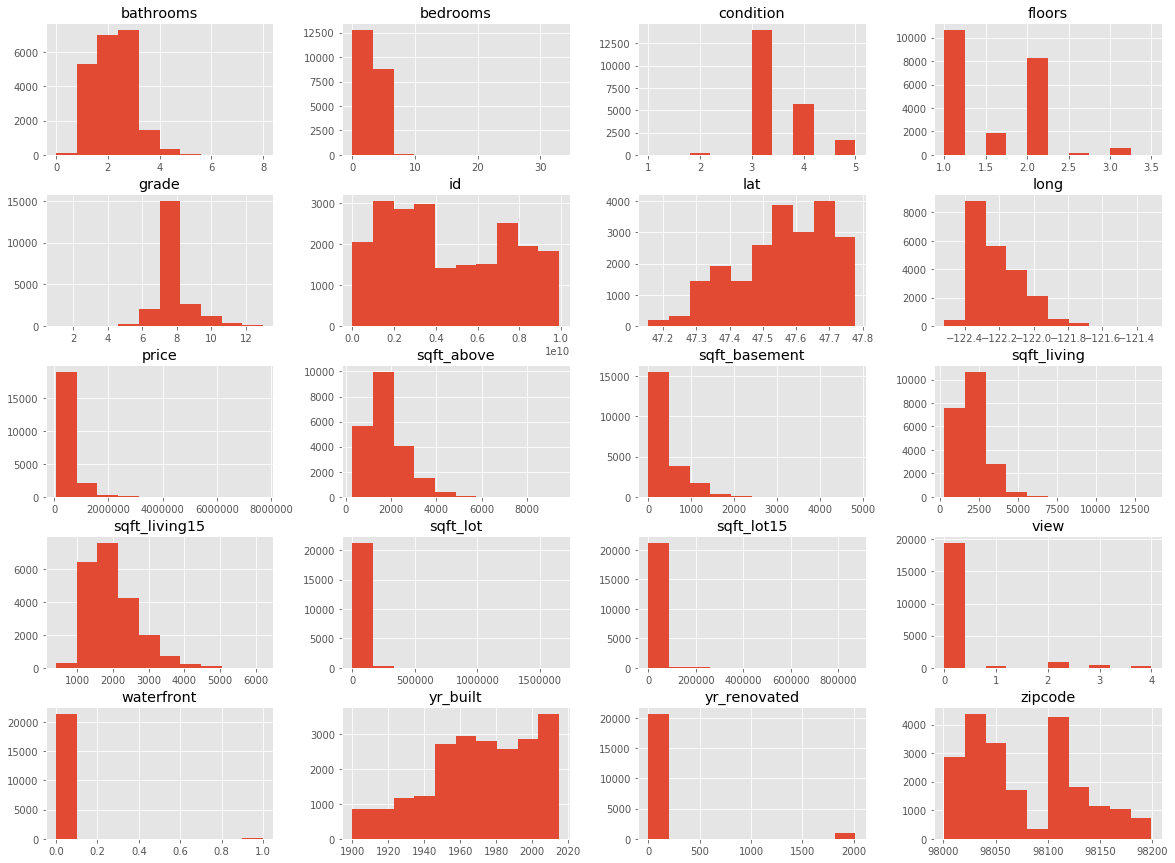

In [108]:
# plotting the histogram of the current data set to view the distribution
df.hist(bins=10, figsize=(20,15))
plt.show()

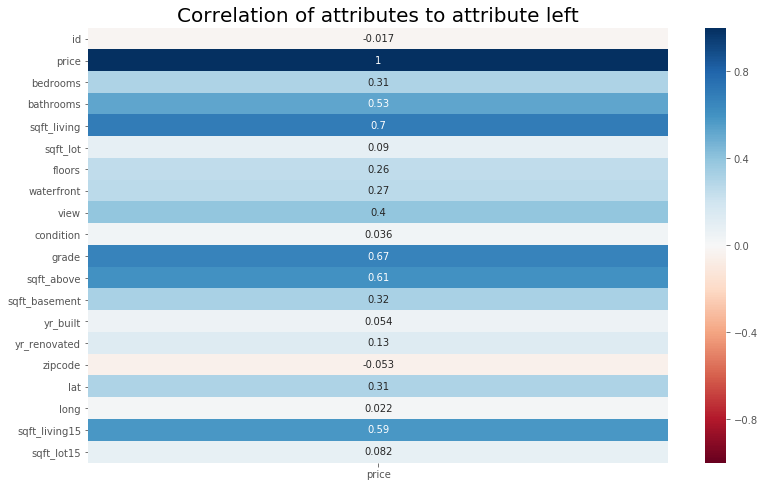

In [109]:
f, ax = plt.subplots(figsize=(13,8))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

ax = sns.heatmap(df.corr()[['price']], annot=True, vmin=-1, vmax=1, cmap="RdBu", ax=ax)
ax.set_title('Correlation of attributes to attribute left', fontsize=20);

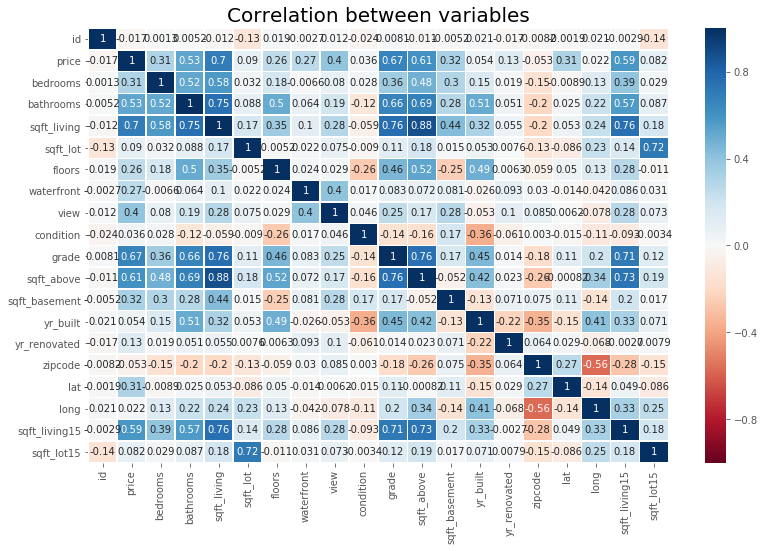

In [110]:
#sns.heatmap(df.corr(),cmap=cmap)
f, ax = plt.subplots(figsize=(13,8))
ax = sns.heatmap(df.corr(),cmap="RdBu", annot=True, xticklabels=True, yticklabels=True, linewidths=.5, vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation between variables', fontsize=20);

## IV. Data Preprocessing



**Features to be Dropped**
*   id
*   date
*   sqft_lot15

**Features for Normalization**
*   sqft_above
*   sqft_basement
*   sqft_living
*   sqft_living15
*   sqft_lot
*   sqft_lot15

**Features for Binning**
*   yr_built
*   yr_renovated

**Features for One Hot Encoding**
*   lat
*   long
*   zipcode












In [111]:
df = df.drop(['id','date'],axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Normalization of Features
ss = StandardScaler()
scale_features = ['sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'price', 'bedrooms', 'bathrooms', 'yr_built', 'yr_renovated', 'sqft_living15','sqft_lot15']
df[scale_features] = ss.fit_transform(df[scale_features])

In [0]:
# One Hot Representation
categorical_features = ['lat','long','zipcode', 'waterfront', 'condition', 'grade', 'view', 'floors']
df[categorical_features] = df[categorical_features].round(2)
df_cat = pd.get_dummies(df[categorical_features].astype(str))
df = df.drop(categorical_features, axis=1)
df = pd.concat ([df, df_cat], axis=1)

In [114]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,lat_47.16,lat_47.18,lat_47.19,lat_47.2,lat_47.21,lat_47.22,lat_47.23,lat_47.24,lat_47.25,lat_47.26,lat_47.27,lat_47.28,lat_47.29,lat_47.3,lat_47.31,lat_47.32,lat_47.33,lat_47.34,lat_47.35,lat_47.36,lat_47.37,lat_47.38,lat_47.39,lat_47.4,lat_47.41,lat_47.42,lat_47.43,lat_47.44,lat_47.45,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_0,waterfront_1,condition_1,condition_2,condition_3,condition_4,condition_5,grade_1,grade_10,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,view_0,view_1,view_2,view_3,view_4,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.734708,-0.658681,-0.544898,-0.210128,-0.943355,-0.260715,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.460841,0.245141,-0.681079,4.746678,-0.432686,-0.187868,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-1.229834,-0.658681,-1.293892,-0.210128,1.070140,-0.172375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.891699,1.397515,-0.204446,-0.210128,-0.914174,-0.284522,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.130895,-0.658681,0.544548,-0.210128,-0.272190,-0.192849,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [0]:
X = df.drop ('price', axis=1).values
y = df['price'].values
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Linear Regression

Train on 12103 samples, validate on 3026 samples
Epoch 1/90
12103/12103 [==============================] - 2s 190us/step - loss: 0.5926 - val_loss: 0.3069
Epoch 2/90
12103/12103 [==============================] - 1s 47us/step - loss: 0.3061 - val_loss: 0.2388
Epoch 3/90
12103/12103 [==============================] - 1s 50us/step - loss: 0.2593 - val_loss: 0.2077
Epoch 4/90
12103/12103 [==============================] - 1s 48us/step - loss: 0.2347 - val_loss: 0.1894
Epoch 5/90
12103/12103 [==============================] - 1s 48us/step - loss: 0.2183 - val_loss: 0.1774
Epoch 6/90
12103/12103 [==============================] - 1s 49us/step - loss: 0.2069 - val_loss: 0.1705
Epoch 7/90
12103/12103 [==============================] - 1s 48us/step - loss: 0.1996 - val_loss: 0.1628
Epoch 8/90
12103/12103 [==============================] - 1s 49us/step - loss: 0.1930 - val_loss: 0.1578
Epoch 9/90
12103/12103 [==============================] - 1s 48us/step - loss: 0.1890 - val_loss: 0.1539
Epoch

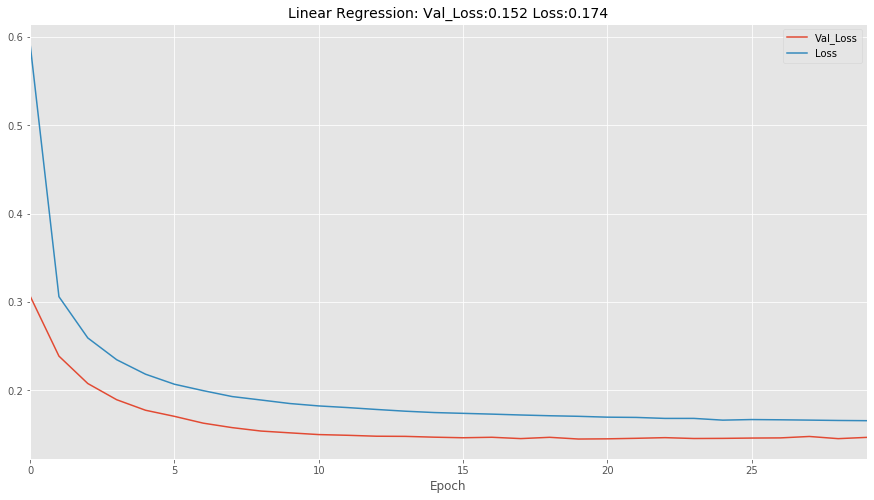

In [116]:
linr_model = Sequential()
linr_model.add(Dense(1,input_shape=(X.shape[1],)))
linr_model.compile('adam','mean_squared_error')
linr_history = linr_model.fit(X_train, y_train, validation_split=0.2, epochs=90)
plotTrainingHist(linr_history, 30, 'Linear Regression')

### ANN Regression

Train on 12103 samples, validate on 3026 samples
Epoch 1/30
12103/12103 [==============================] - 3s 217us/step - loss: 0.2794 - val_loss: 0.1558
Epoch 2/30
12103/12103 [==============================] - 1s 62us/step - loss: 0.1236 - val_loss: 0.1099
Epoch 3/30
12103/12103 [==============================] - 1s 60us/step - loss: 0.1013 - val_loss: 0.0953
Epoch 4/30
12103/12103 [==============================] - 1s 61us/step - loss: 0.0900 - val_loss: 0.0967
Epoch 5/30
12103/12103 [==============================] - 1s 59us/step - loss: 0.0837 - val_loss: 0.0973
Epoch 6/30
12103/12103 [==============================] - 1s 61us/step - loss: 0.0749 - val_loss: 0.0977
Epoch 7/30
12103/12103 [==============================] - 1s 60us/step - loss: 0.0687 - val_loss: 0.0954
Epoch 8/30
12103/12103 [==============================] - 1s 62us/step - loss: 0.0660 - val_loss: 0.1101
Epoch 9/30
12103/12103 [==============================] - 1s 61us/step - loss: 0.0610 - val_loss: 0.1278
Epoch

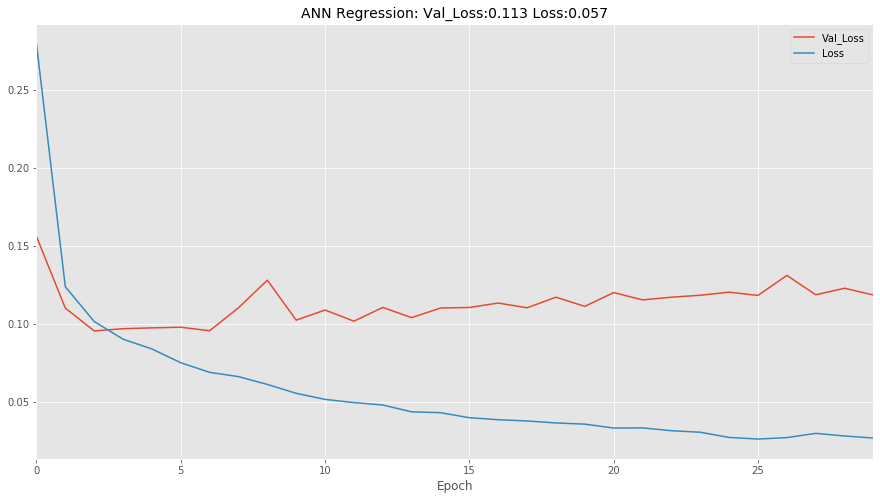

In [117]:
deep_model = Sequential()
deep_model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
deep_model.add(Dense(16, activation='relu'))
deep_model.add(Dense(8, activation='relu'))
deep_model.add(Dense(1))
deep_model.compile('adam','mean_squared_error')
deep_history = deep_model.fit(X_train, y_train, validation_split=0.2, epochs=30)
plotTrainingHist(deep_history, 30, 'ANN Regression')

### ANN Regression with EarlyStopping

Train on 12103 samples, validate on 3026 samples
Epoch 1/30
12103/12103 [==============================] - 3s 225us/step - loss: 0.2670 - val_loss: 0.1231
Epoch 2/30
12103/12103 [==============================] - 1s 62us/step - loss: 0.1322 - val_loss: 0.1165
Epoch 3/30
12103/12103 [==============================] - 1s 65us/step - loss: 0.0941 - val_loss: 0.1503
Epoch 4/30
12103/12103 [==============================] - 1s 63us/step - loss: 0.0893 - val_loss: 0.1041
Epoch 5/30
12103/12103 [==============================] - 1s 63us/step - loss: 0.0780 - val_loss: 0.1049
Epoch 6/30
12103/12103 [==============================] - 1s 64us/step - loss: 0.0707 - val_loss: 0.1060
Epoch 7/30
12103/12103 [==============================] - 1s 63us/step - loss: 0.0679 - val_loss: 0.1064
Epoch 8/30
12103/12103 [==============================] - 1s 62us/step - loss: 0.0638 - val_loss: 0.1127
Epoch 9/30
12103/12103 [==============================] - 1s 62us/step - loss: 0.0570 - val_loss: 0.1145
Epoch

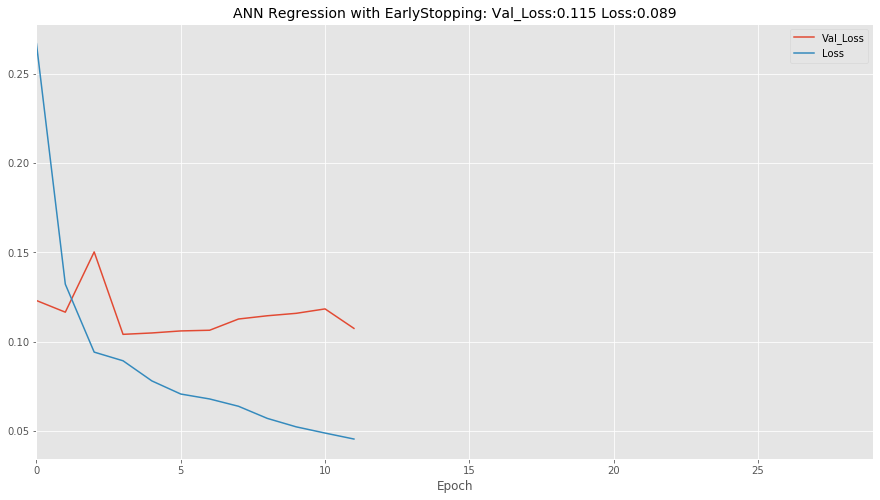

In [118]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

deep_model = Sequential()
deep_model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
deep_model.add(Dense(16, activation='relu'))
deep_model.add(Dense(8, activation='relu'))
deep_model.add(Dense(1))
deep_model.compile('adam','mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss',patience=8,verbose=1)
deep_history = deep_model.fit(X_train, y_train, epochs=30, validation_split=0.2, callbacks=[early_stop])
plotTrainingHist(deep_history, 30, 'ANN Regression with EarlyStopping')

### Comparison of Linear Regression to ANN Regression

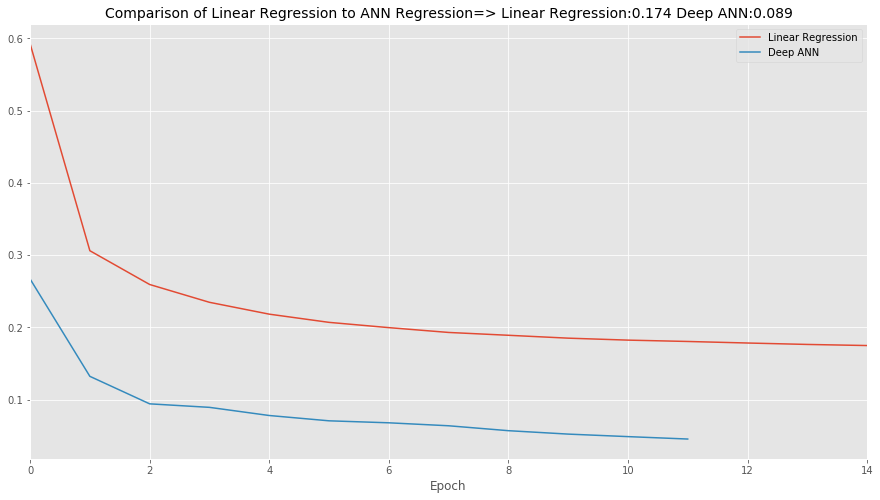

In [119]:
def compareTrainingHist(reg1, reg2, epoch, regType):
  plt.figure(figsize=(15,8))
  plt.plot(reg1.history['loss'])
  plt.plot(reg2.history['loss'])
  plt.xlim(0, 14)
  plt.xlabel('Epoch')
  plt.legend(['Linear Regression', 'Deep ANN'], loc='upper right')
  plt.title(regType + '=> Linear Regression:' + str(round(np.mean(reg1.history['loss']),3)) + ' ' + 'Deep ANN:'+ str(round(np.mean(reg2.history['loss']),3)), fontsize=14)
  plt.show()

compareTrainingHist(linr_history, deep_history, 30, 'Comparison of Linear Regression to ANN Regression')